In [35]:
import os
from tqdm import tqdm
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import shutil
import sys
from torch.utils.data import Dataset, DataLoader

In [36]:
image_base_path = "../data/images/"
tensor_output_path = "../data/tensor_images/"

In [37]:
if os.path.exists(tensor_output_path):
    shutil.rmtree(tensor_output_path)
os.makedirs(tensor_output_path, exist_ok=True)

In [38]:
emoji_categories = ["GoogleEmoji", "JoyPixelsEmoji", "OpenMojiEmoji", "TwitterEmoji"]
sticker_categories = ["AlexatorStickers", "FlaticonStickers", "FreepikStickers"]

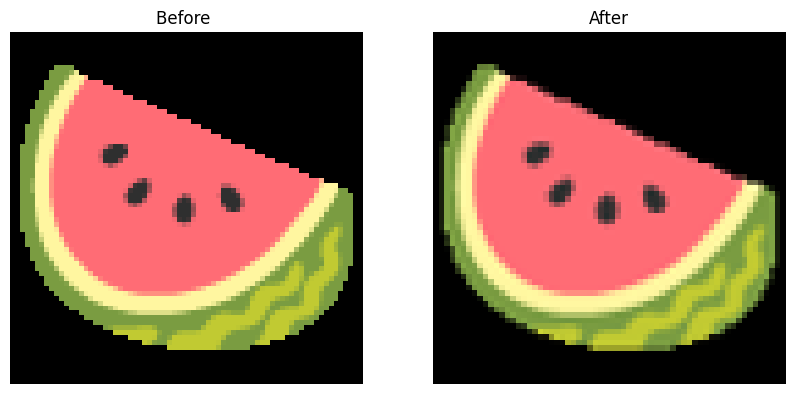

In [39]:
for category in emoji_categories:
    category_folder = os.path.join(image_base_path, category)

    if not os.path.exists(category_folder):
        print(f"Folder not found: {category_folder}")
        continue

    image_files = os.listdir(category_folder)
    if len(image_files) == 0:
        print(f"No images in {category_folder}")
        continue

    img_path = os.path.join(category_folder, image_files[156])
    
    # Open Image
    img = Image.open(img_path).convert('RGB')

    # Resize 
    resized_img = img.resize((64, 64))

    plt.figure(figsize=(10, 10))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Before ")
    plt.axis("off")

    # Resized Image
    plt.subplot(1, 2, 2)
    plt.imshow(resized_img)
    plt.title("After")
    plt.axis("off")

    plt.show()
    break  

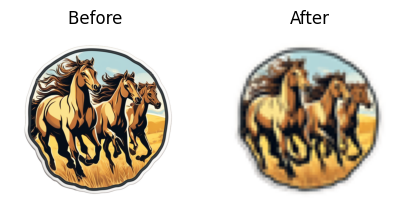

In [40]:
for category in sticker_categories:
    category_folder = os.path.join(image_base_path, category)

    if not os.path.exists(category_folder):
        print(f"Folder not found: {category_folder}")
        continue

    image_files = os.listdir(category_folder)
    if len(image_files) == 0:
        print(f"No images in {category_folder}")
        continue

    img_path = os.path.join(category_folder, image_files[156])
    
    # Open Image
    img = Image.open(img_path).convert('RGB')

    # Resize 
    resized_img = img.resize((64, 64))

    plt.figure(figsize=(5, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Before ")
    plt.axis("off")

    # Resized Image
    plt.subplot(1, 2, 2)
    plt.imshow(resized_img)
    plt.title("After")
    plt.axis("off")

    plt.show()
    break  

In [41]:
emoji_base_transform = transforms.Compose([
    transforms.Resize((64, 64)),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])
sticker_base_transform = transforms.Compose([
    transforms.Resize((64, 64)),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [42]:
# Calculate the total number of files to process
total_files = sum(len(os.listdir(os.path.join(image_base_path, ecategory))) for ecategory in emoji_categories)

# Initialize a single tqdm progress bar with dynamic_ncols and stdout redirection
progress_bar = tqdm(total=total_files, desc="Processing Emoji Images", dynamic_ncols=True, file=sys.stdout)

for ecategory in emoji_categories:
    ecategory_folder = os.path.join(image_base_path, ecategory)
    tensor_category_path = os.path.join(tensor_output_path, ecategory)

    os.makedirs(tensor_category_path, exist_ok=True)
    
    for filename in os.listdir(ecategory_folder):
        # Added this code to ignore the .DS_Store file on mac
        if filename == ".DS_Store":  # Ignore macOS system file
            continue
        
        img_path = os.path.join(ecategory_folder, filename)

        new_name = filename.replace("emoji_u", "").replace("_", "-").lower()
        new_name = new_name.replace("-fe0f", "").replace("-200d", "")
        
        img = Image.open(img_path) # Path of the image
        
        if img.mode == "P":  # Fix transparency warning by converting png files to RGBA first
                img = img.convert("RGBA")

        img = img.convert("RGB")  # Convert to RGB format
        img_tensor = emoji_base_transform(img)

        # Save as .pt file
        tensor_file = new_name.replace(".png", ".pt").replace(".jpg", ".pt")
        torch.save(img_tensor, os.path.join(tensor_category_path, tensor_file))

        # Update progress bar after processing each file
        progress_bar.update(1)

progress_bar.close()
print("All emoji images processed successfully!")

Processing Emoji Images: 100%|██████████| 12559/12559 [00:13<00:00, 965.62it/s] 
All emoji images processed successfully!


In [43]:
# Calculate the total number of files to process
total_files = sum(len(os.listdir(os.path.join(image_base_path, scategory))) for scategory in sticker_categories)

# Initialize a single tqdm progress bar with dynamic_ncols and stdout redirection
progress_bar = tqdm(total=total_files, desc="Processing Sticker Images", dynamic_ncols=True, file=sys.stdout)

for scategory in sticker_categories:
    scategory_folder = os.path.join(image_base_path, scategory)
    tensor_category_path = os.path.join(tensor_output_path, scategory)

    os.makedirs(tensor_category_path, exist_ok=True)
    
    for filename in os.listdir(scategory_folder):
        # Added this code to ignore the .DS_Store file on mac
        if filename == ".DS_Store":  # Ignore macOS system file
            continue
        
        img_path = os.path.join(scategory_folder, filename)
        
        img = Image.open(img_path) # Path of the image
        
        if img.mode == "P":  # Fix transparency warning by converting png files to RGBA first
                img = img.convert("RGBA")

        img = img.convert("RGB")  # Convert to RGB format
        img_tensor = sticker_base_transform(img)

        # Save as .pt file
        tensor_file = filename.replace(".png", ".pt").replace(".jpg", ".pt")
        torch.save(img_tensor, os.path.join(tensor_category_path, tensor_file))

        # Update progress bar after processing each file
        progress_bar.update(1)

progress_bar.close()
print("All sticker images processed successfully!")

Processing Sticker Images: 100%|██████████| 55082/55082 [05:17<00:00, 173.55it/s]
All sticker images processed successfully!
